<a href="https://colab.research.google.com/github/rafiag/Telkom-Digital-Talent-Incubator-Data-Scientist/blob/main/001_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator*


---




# **Regression**
Regression analysis is a basic method used in statistical analysis of data. It’s a statistical method which allows estimating the relationships among variables. One needs to identify dependent variable which will vary based on the value of the independent variable.

## **Simple Linear Regression**

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import Dataset
df_house = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/house-price.csv', sep =";")
df_house

,house_price,square_feet
0,245,1400
1,312,1600
2,279,1700
3,308,1875
4,199,1100
5,219,1550
6,405,2350
7,324,2450
8,319,1425
9,255,1700


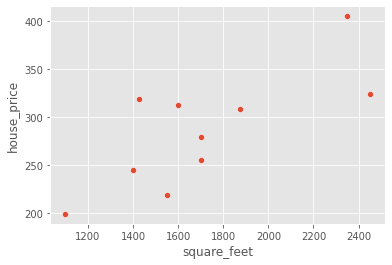

In [3]:
# Visualize the data using scatterplot
sns.scatterplot(x="square_feet", y="house_price", data= df_house)


### **Regression using Sklearn**

In [4]:
X = df_house[['square_feet']]
Y = df_house['house_price']

In [5]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 98.24832962138078
Coefficients: 
 [0.10976774]


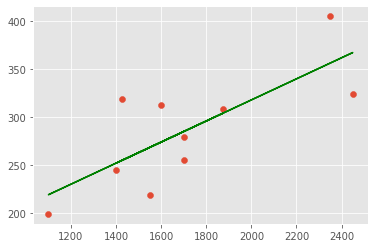

In [7]:
# Visualizing Linear Regression
plt.scatter(X, Y)
plt.plot(X, regr.predict(X), color = "green")
plt.show()

In [8]:
# prediction with sklearn
new_square_feet = 2000
print ('Predicted  house price: \n', regr.predict([[new_square_feet]]))

Predicted  house price: 
 [317.78380528]


### **Regression using Statsmodels**

In [9]:
X = sm.add_constant(X) # adding a constant

In [10]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            house_price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     11.08
Date:                Sat, 24 Oct 2020   Prob (F-statistic):             0.0104
Time:                        16:07:04   Log-Likelihood:                -50.290
No. Observations:                  10   AIC:                             104.6
Df Residuals:                       8   BIC:                             105.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          98.2483     58.033      1.693      